In [1]:
import seaborn as sns

sns.set_style("ticks")
sns.set_context("talk", font_scale=1.5)

<h1 style="text-align: center;">Astropy</h1>
<h2 style="text-align: center;">and what it can do for you 🫵</h2>
<h3 style="text-align: center;">Units, Coordinates, & Tables</h3>
<br/>
<br/>
<br/>
<center><img src="astropy.png" /></center>
<br/>
<br/>
<h3 style="text-align: center;">Astronomy Coding Education Talk</h3>
<h4 style="text-align: center;">Nicholas Earl, 22 Feb 2024</h4>

# Units

- Provides a comprehensive framework for representing and manipulating physical quantities in Python.
- Offers a wide range of units for quantities such as length, mass, time, temperature, etc.
- Enables easy conversion between different units, ensuring consistency and accuracy.
- Supports arithmetic operations and mathematical functions on quantities with automatic unit conversion.
- Facilitates unit checking to detect and prevent errors in calculations involving incompatible units.
- Integrates seamlessly with other Astropy subpackages and third-party libraries for scientific computing and data analysis.

## Attaching a unit to a number turns it into a ✨`Quantity`✨, which are just fancy numpy arrays

In [2]:
import astropy.units as u

answer_to_the_ultimate_question_of_life_the_universe_and_everything = 42 * u.g

answer_to_the_ultimate_question_of_life_the_universe_and_everything

<Quantity 42. g>

In [3]:
type(answer_to_the_ultimate_question_of_life_the_universe_and_everything)

astropy.units.quantity.Quantity

In [4]:
import numpy as np

isinstance(answer_to_the_ultimate_question_of_life_the_universe_and_everything, np.ndarray)

True

## Because it's all numpy all the time, `Quantity` arrays are just as simple

In [5]:
answer_to_everything_matrix = np.ones(shape=(42, 42)) * 42 * u.g

answer_to_everything_matrix

<Quantity [[42., 42., 42., ..., 42., 42., 42.],
           [42., 42., 42., ..., 42., 42., 42.],
           [42., 42., 42., ..., 42., 42., 42.],
           ...,
           [42., 42., 42., ..., 42., 42., 42.],
           [42., 42., 42., ..., 42., 42., 42.],
           [42., 42., 42., ..., 42., 42., 42.]] g>

## Being numpy-derived, they can **generally** be used in numpy functions _whose return values you'd expect to have units_

In [6]:
np.sum(answer_to_everything_matrix)

<Quantity 74088. g>

In [7]:
np.log10(answer_to_everything_matrix)

UnitTypeError: Can only apply 'log10' function to dimensionless quantities

## Arithmetic is straight-forward, as long as it arithmetically makes sense

In [8]:
answer_to_everything = 42 * u.g
answer_to_nothing = 3 * u.g

answer_to_everything + answer_to_nothing

<Quantity 45. g>

In [9]:
answer_to_nothing = 3 * u.Msun

answer_to_everything + answer_to_nothing

<Quantity 5.96522961e+33 g>

In [10]:
answer_to_nothing = 3 * u.cm

answer_to_everything + answer_to_nothing

UnitConversionError: Can only apply 'add' function to quantities with compatible dimensions

## Converting `Quantity` objects is done using their `.to` method

In [11]:
answer_to_everything.to(u.Msun)

<Quantity 2.11224057e-32 solMass>

But because astronomy is *so good*, we often translate between seemingly non-compatible units

In [12]:
answer_to_everything = 6562 * u.AA

answer_to_everything.to(u.Hz)

UnitConversionError: 'Angstrom' (length) and 'Hz' (frequency) are not convertible

These special cases can be dealt with by using `equivalencies`. Astropy comes with a bunch already, but you can also define your own.

In [13]:
answer_to_everything.to(u.Hz, equivalencies=u.spectral())

<Quantity 4.56861411e+14 Hz>

In [14]:
answer_to_everything = (42 * u.g).to(u.Joule, equivalencies=u.mass_energy())
answer_to_everything

<Quantity 3.77477175e+15 J>

## Units are system-aware

In [15]:
print(answer_to_everything.cgs)
print(answer_to_everything.si)

3.774771750694634e+22 erg
3774771750694634.0 N m


This is useful when wanting to reduce some weird combination of units

In [16]:
answer_to_something = 42 * (u.g / u.Rsun * u.erg ** 2 / u.Joule)

print(answer_to_something)
print(answer_to_something.cgs)

42.0 erg2 g / (J solRad)
6.037084950409658e-17 dyn g


## The `constants` module contains a bunch of useful unit-ful quantities

<table class="table">
<thead>
<tr class="row-odd"><th class="head"><p>Name</p></th>
<th class="head"><p>Value</p></th>
<th class="head"><p>Unit</p></th>
<th class="head"><p>Description</p></th>
</tr>
</thead>
<tbody>
<tr class="row-even"><td><p>G</p></td>
<td><p>6.6743e-11</p></td>
<td><p>m3 / (kg s2)</p></td>
<td><p>Gravitational constant</p></td>
</tr>
<tr class="row-odd"><td><p>N_A</p></td>
<td><p>6.02214076e+23</p></td>
<td><p>1 / (mol)</p></td>
<td><p>Avogadro’s number</p></td>
</tr>
<tr class="row-even"><td><p>R</p></td>
<td><p>8.31446262</p></td>
<td><p>J / (K mol)</p></td>
<td><p>Gas constant</p></td>
</tr>
<tr class="row-odd"><td><p>Ryd</p></td>
<td><p>10973731.6</p></td>
<td><p>1 / (m)</p></td>
<td><p>Rydberg constant</p></td>
</tr>
<tr class="row-even"><td><p>a0</p></td>
<td><p>5.29177211e-11</p></td>
<td><p>m</p></td>
<td><p>Bohr radius</p></td>
</tr>
<tr class="row-odd"><td><p>alpha</p></td>
<td><p>0.00729735257</p></td>
<td></td>
<td><p>Fine-structure constant</p></td>
</tr>
<tr class="row-even"><td><p>atm</p></td>
<td><p>101325</p></td>
<td><p>Pa</p></td>
<td><p>Standard atmosphere</p></td>
</tr>
<tr class="row-odd"><td><p>b_wien</p></td>
<td><p>0.00289777196</p></td>
<td><p>m K</p></td>
<td><p>Wien wavelength displacement law constant</p></td>
</tr>
<tr class="row-even"><td><p>c</p></td>
<td><p>299792458</p></td>
<td><p>m / (s)</p></td>
<td><p>Speed of light in vacuum</p></td>
</tr>
<tr class="row-odd"><td><p>e</p></td>
<td><p>1.60217663e-19</p></td>
<td><p>C</p></td>
<td><p>Electron charge</p></td>
</tr>
<tr class="row-even"><td><p>eps0</p></td>
<td><p>8.85418781e-12</p></td>
<td><p>F/m</p></td>
<td><p>Vacuum electric permittivity</p></td>
</tr>
<tr class="row-odd"><td><p>g0</p></td>
<td><p>9.80665</p></td>
<td><p>m / s2</p></td>
<td><p>Standard acceleration of gravity</p></td>
</tr>
<tr class="row-even"><td><p>h</p></td>
<td><p>6.62607015e-34</p></td>
<td><p>J s</p></td>
<td><p>Planck constant</p></td>
</tr>
<tr class="row-odd"><td><p>hbar</p></td>
<td><p>1.05457182e-34</p></td>
<td><p>J s</p></td>
<td><p>Reduced Planck constant</p></td>
</tr>
<tr class="row-even"><td><p>k_B</p></td>
<td><p>1.380649e-23</p></td>
<td><p>J / (K)</p></td>
<td><p>Boltzmann constant</p></td>
</tr>
<tr class="row-odd"><td><p>m_e</p></td>
<td><p>9.1093837e-31</p></td>
<td><p>kg</p></td>
<td><p>Electron mass</p></td>
</tr>
<tr class="row-even"><td><p>m_n</p></td>
<td><p>1.6749275e-27</p></td>
<td><p>kg</p></td>
<td><p>Neutron mass</p></td>
</tr>
<tr class="row-odd"><td><p>m_p</p></td>
<td><p>1.67262192e-27</p></td>
<td><p>kg</p></td>
<td><p>Proton mass</p></td>
</tr>
<tr class="row-even"><td><p>mu0</p></td>
<td><p>1.25663706e-06</p></td>
<td><p>N/A2</p></td>
<td><p>Vacuum magnetic permeability</p></td>
</tr>
<tr class="row-odd"><td><p>muB</p></td>
<td><p>9.27401008e-24</p></td>
<td><p>J/T</p></td>
<td><p>Bohr magneton</p></td>
</tr>
<tr class="row-even"><td><p>sigma_T</p></td>
<td><p>6.65245873e-29</p></td>
<td><p>m2</p></td>
<td><p>Thomson scattering cross-section</p></td>
</tr>
<tr class="row-odd"><td><p>sigma_sb</p></td>
<td><p>5.67037442e-08</p></td>
<td><p>W / (K4 m2)</p></td>
<td><p>Stefan-Boltzmann constant</p></td>
</tr>
<tr class="row-even"><td><p>u</p></td>
<td><p>1.66053907e-27</p></td>
<td><p>kg</p></td>
<td><p>Atomic mass</p></td>
</tr>
<tr class="row-odd"><td><p>GM_earth</p></td>
<td><p>3.986004e+14</p></td>
<td><p>m3 / (s2)</p></td>
<td><p>Nominal Earth mass parameter</p></td>
</tr>
<tr class="row-even"><td><p>GM_jup</p></td>
<td><p>1.2668653e+17</p></td>
<td><p>m3 / (s2)</p></td>
<td><p>Nominal Jupiter mass parameter</p></td>
</tr>
<tr class="row-odd"><td><p>GM_sun</p></td>
<td><p>1.3271244e+20</p></td>
<td><p>m3 / (s2)</p></td>
<td><p>Nominal solar mass parameter</p></td>
</tr>
<tr class="row-even"><td><p>L_bol0</p></td>
<td><p>3.0128e+28</p></td>
<td><p>W</p></td>
<td><p>Luminosity for absolute bolometric magnitude 0</p></td>
</tr>
<tr class="row-odd"><td><p>L_sun</p></td>
<td><p>3.828e+26</p></td>
<td><p>W</p></td>
<td><p>Nominal solar luminosity</p></td>
</tr>
<tr class="row-even"><td><p>M_earth</p></td>
<td><p>5.97216787e+24</p></td>
<td><p>kg</p></td>
<td><p>Earth mass</p></td>
</tr>
<tr class="row-odd"><td><p>M_jup</p></td>
<td><p>1.8981246e+27</p></td>
<td><p>kg</p></td>
<td><p>Jupiter mass</p></td>
</tr>
<tr class="row-even"><td><p>M_sun</p></td>
<td><p>1.98840987e+30</p></td>
<td><p>kg</p></td>
<td><p>Solar mass</p></td>
</tr>
<tr class="row-odd"><td><p>R_earth</p></td>
<td><p>6378100</p></td>
<td><p>m</p></td>
<td><p>Nominal Earth equatorial radius</p></td>
</tr>
<tr class="row-even"><td><p>R_jup</p></td>
<td><p>71492000</p></td>
<td><p>m</p></td>
<td><p>Nominal Jupiter equatorial radius</p></td>
</tr>
<tr class="row-odd"><td><p>R_sun</p></td>
<td><p>695700000</p></td>
<td><p>m</p></td>
<td><p>Nominal solar radius</p></td>
</tr>
<tr class="row-even"><td><p>au</p></td>
<td><p>1.49597871e+11</p></td>
<td><p>m</p></td>
<td><p>Astronomical Unit</p></td>
</tr>
<tr class="row-odd"><td><p>kpc</p></td>
<td><p>3.08567758e+19</p></td>
<td><p>m</p></td>
<td><p>Kiloparsec</p></td>
</tr>
<tr class="row-even"><td><p>pc</p></td>
<td><p>3.08567758e+16</p></td>
<td><p>m</p></td>
<td><p>Parsec</p></td>
</tr>
</tbody>
</table>

## *Un exemple* 🥖

$$B_\lambda (\lambda, T) = \frac{2 h c^2}{\lambda^5} \frac{1}{e^{h c / (\lambda k_B T)} - 1}$$

In [17]:
import astropy.constants as const

temp = 5778 * u.K
lam = np.arange(1000, 110000) * u.AA

bb = 2 * const.h * const.c ** 2 / lam ** 5 * 1 / (np.exp(const.h * const.c / (lam * const.k_B * temp)) - 1)
bb

<Quantity [1.82634304e-42, 1.86301138e-42, 1.90033105e-42, ...,
           2.91141254e-41, 2.91130978e-41, 2.91120702e-41] m2 J / (s Angstrom5)>

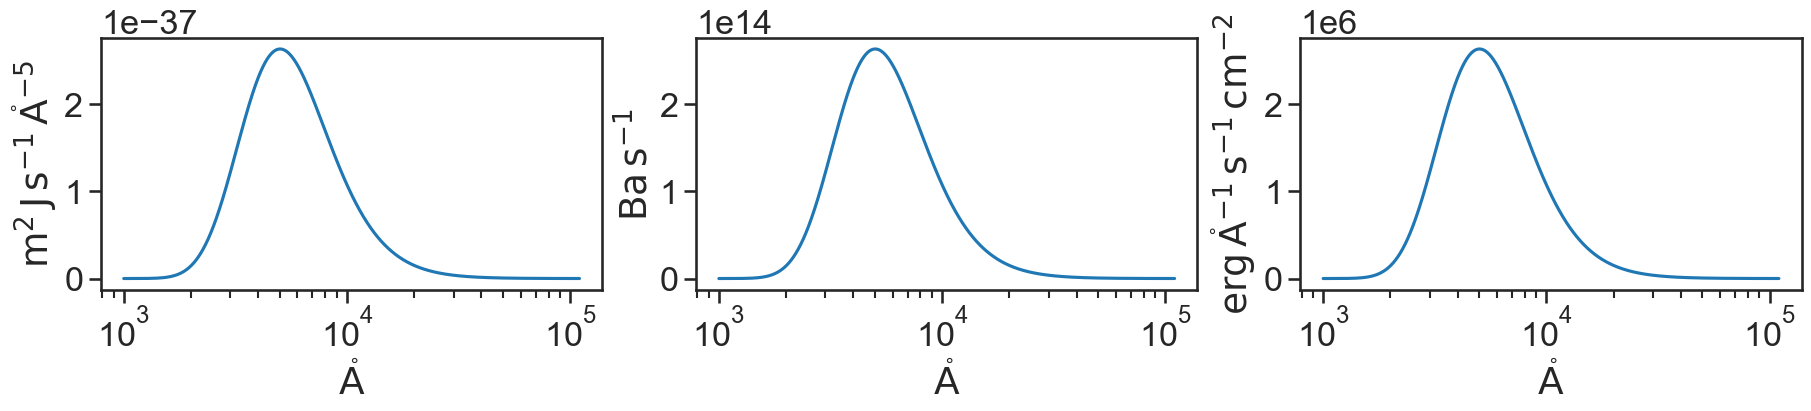

In [18]:
import matplotlib.pyplot as plt
from astropy.visualization import quantity_support

f, (ax1, ax2, ax3) = plt.subplots(1, 3, layout='constrained', figsize=(18, 4))

with quantity_support():
    ax1.semilogx(lam, bb)
    ax2.semilogx(lam, bb.cgs)
    ax3.semilogx(lam, bb.to(u.erg / u.s / u.cm ** 2 / u.AA))

# Coordinates

- Facilitates the representation and manipulation of astronomical coordinates in various coordinate systems.
- Supports common coordinate systems such as Equatorial (RA/Dec), Galactic, and Ecliptic coordinates.
- Provides tools for transforming coordinates between different systems and epochs.
- Enables handling of celestial coordinate transformations accounting for precession, nutation, and proper motion.
- Offers functionalities for coordinate arithmetic, including angular separation calculations and coordinate frame transformations.
- Integrates with other Astropy subpackages and external astronomical data sources for seamless data analysis and visualization.

## On the sky coordinates: 🌌`SkyCoord`🌌

In [19]:
from astropy.coordinates import SkyCoord

position = SkyCoord(12.11 * u.deg, 85.29 * u.deg)  # Using astropy units
position

<SkyCoord (ICRS): (ra, dec) in deg
    (12.11, 85.29)>

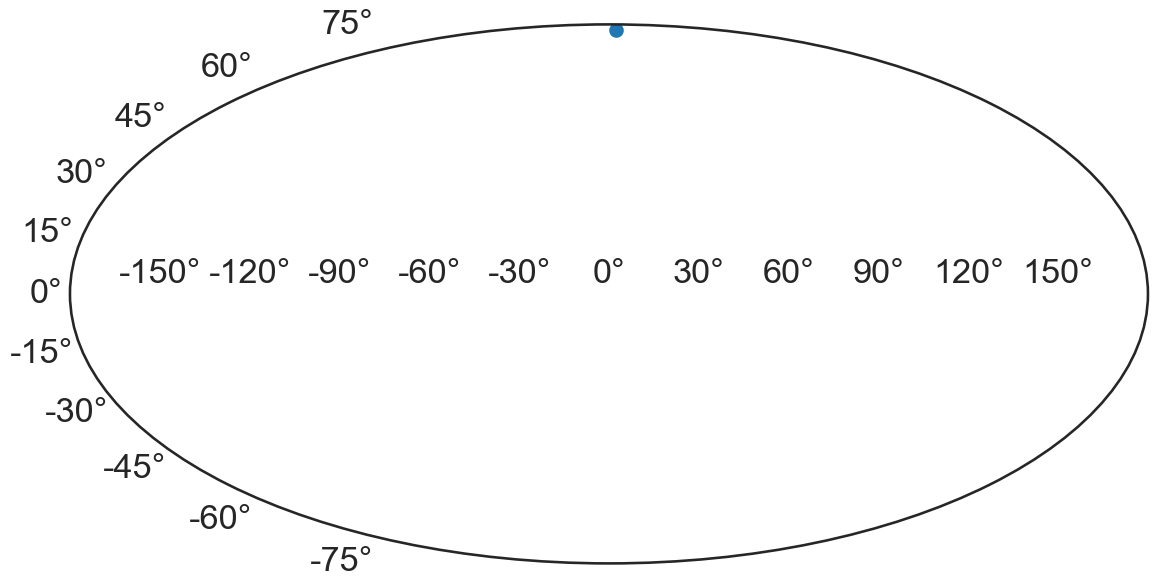

In [89]:
f, ax = plt.subplots(subplot_kw={'projection': 'mollweide'}, figsize=(18, 7))

ax.scatter(position.ra.wrap_at(180*u.degree).radian, position.dec.radian)

## The `SkyCoord` object accepts position information in several unit formats, such as:

In [21]:
position = SkyCoord('00h48m26.4s', '85d15m36s')  # Sexigismal
position

<SkyCoord (ICRS): (ra, dec) in deg
    (12.11, 85.26)>

In [22]:
position = SkyCoord('00:48:26.4 85:15:36', unit=(u.hour, u.deg))  # Explicit string definition
position

<SkyCoord (ICRS): (ra, dec) in deg
    (12.11, 85.26)>

Just make sure you're using the correct unit format!

<img src="simbad-ngc188.png" />

## `ICRS` frame coordinates (sometimes called "equitorial" or "J2000" coordinates) are the most popular in astronomy, and the default; but it can be changed!

In [23]:
position = SkyCoord(12.11 * u.deg, 85.29 * u.deg, frame='icrs')

for frame in ('fk5', 'galactic', 'icrs'):
    position = position.transform_to(frame)
    print(f"{frame}: {position}")

fk5: <SkyCoord (FK5: equinox=J2000.000): (ra, dec) in deg
    (12.1100784, 85.29000131)>
galactic: <SkyCoord (Galactic): (l, b) in deg
    (122.86535422, 22.41863992)>
icrs: <SkyCoord (ICRS): (ra, dec) in deg
    (12.11, 85.29)>


Accessing the RA and Dec in different units is straightforward -- they are `Quantities`!

In [24]:
print(position.ra.to(u.hourangle))
print(position.ra.to(u.radian))
print(position.ra.to(u.degree))

0h48m26.4s
0.211359 rad
12d06m36s


In [25]:
# Shorthands

print(position.ra.deg)
print(position.ra.hms)
print(position.ra.radian)

12.109999999999843
hms_tuple(h=0.0, m=48.0, s=26.399999999962773)
0.21135937241651057


## `SpectralCoord`: an easy way to manage spectral axis information

In [26]:
from astropy.coordinates import SpectralCoord

spec_coord = SpectralCoord(34.2, unit=u.GHz)
spec_coord

<SpectralCoord 34.2 GHz>

In [27]:
spec_coord = SpectralCoord(np.linspace(6000, 7000), unit=u.AA)
spec_coord

<SpectralCoord [6000.        , 6020.40816327, 6040.81632653, 6061.2244898 ,
   6081.63265306, 6102.04081633, 6122.44897959, 6142.85714286,
   6163.26530612, 6183.67346939, 6204.08163265, 6224.48979592,
   6244.89795918, 6265.30612245, 6285.71428571, 6306.12244898,
   6326.53061224, 6346.93877551, 6367.34693878, 6387.75510204,
   6408.16326531, 6428.57142857, 6448.97959184, 6469.3877551 ,
   6489.79591837, 6510.20408163, 6530.6122449 , 6551.02040816,
   6571.42857143, 6591.83673469, 6612.24489796, 6632.65306122,
   6653.06122449, 6673.46938776, 6693.87755102, 6714.28571429,
   6734.69387755, 6755.10204082, 6775.51020408, 6795.91836735,
   6816.32653061, 6836.73469388, 6857.14285714, 6877.55102041,
   6897.95918367, 6918.36734694, 6938.7755102 , 6959.18367347,
   6979.59183673, 7000.        ] Angstrom>

## Designed to help with manipulation of spectroscopic data

In [28]:
(spec_coord.to(u.Hz)[0],
 spec_coord.to(u.eV)[0],
 spec_coord.to(u.micron)[0])

(<SpectralCoord 4.99654097e+14 Hz>,
 <SpectralCoord 2.06640331 eV>,
 <SpectralCoord 0.6 micron>)

An annoying transformation is when you want something in velocity space. With `SpectralCoord`, it's easy!

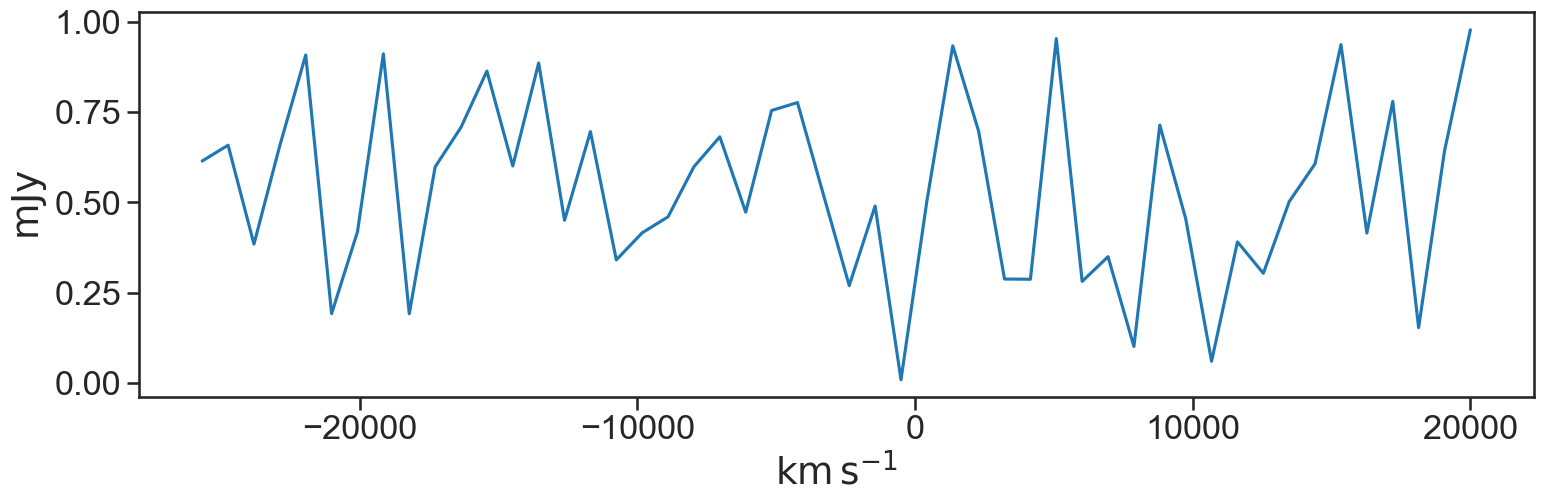

In [29]:
spec_coord = spec_coord.to(u.km / u.s, doppler_convention='optical', doppler_rest=6562 * u.AA)  # Center on "halpha"

f, ax = plt.subplots(figsize=(18, 5))

with quantity_support():
    ax.plot(spec_coord, np.random.sample(spec_coord.shape) * u.mJy)

## Dealing with redshift and radial velocities is a cinch

In [30]:
halpha = SpectralCoord(8206.25 * u.AA, redshift=0.25)
print(halpha.__repr__())

<SpectralCoord 
   (observer to target:
      radial_velocity=65808.10053658536 km / s
      redshift=0.25)
  8206.25 Angstrom>


In [31]:
rest_halpha = halpha.to_rest()

print(rest_halpha.__repr__())

<SpectralCoord 
   (observer to target:
      radial_velocity=0.0 km / s
      redshift=0.0)
  6565. Angstrom>


Or to change the redshift or velocity shift *post-facto*

In [32]:
shifted_halpha = rest_halpha.with_radial_velocity_shift(0.5)

print(shifted_halpha.__repr__())

<SpectralCoord 
   (observer to target:
      radial_velocity=115304.79153846155 km / s
      redshift=0.5000000000000002)
  9847.5 Angstrom>


# Tables

- Offers a flexible and efficient framework for handling tabular data in Python.
- Provides a high-level Table object for storing and manipulating data in columnar format.
- Supports various data formats, including FITS, ASCII, HDF5, and VO tables.
- Enables easy manipulation of table data, including column addition, deletion, and modification.
- Facilitates advanced data operations such as sorting, filtering, grouping, and joining.
- Integrates with Astropy's units and coordinates packages, allowing for seamless handling of physical quantities and astronomical coordinates within tables.
- Offers interoperability with other Python libraries for data analysis, visualization, and scientific computing.

## Creating a table from lists or arrays

In [33]:
from astropy.table import Table

names = ["NGC 1952", "NGC 7089", "NGC 5272", "NGC 6121", "NGC 5904", "NGC 6475", "NGC 6523", "NGC 6333"]
app_mags = [8.4, 6.5, 6.2, 5.6, 5.6, 3.3, 4.6, 7.7]
ras = ["05h 34m 31.94s", "21h 33m 27.02s", "13h 42m 11.62s", "16h 23m 35.22s", "15h 18m 33.22s", "17h 53m 51.2s", "18h 03m 37s", "17h 19m 11.78s"]
decs = ["22° 00′ 52.2″", "−00° 49′ 23.7″", "28° 22′ 38.2″", "−26° 31′ 32.7″", "02° 04′ 51.7″",  "−34° 47′ 34″", "−24° 23′ 12″", "−18° 30′ 58.5″"]

mess_tab = Table([names, app_mags, ras, decs], names=('name', 'apparent mag', 'ra', 'dec'))
mess_tab

name,apparent mag,ra,dec
str8,float64,str14,str14
NGC 1952,8.4,05h 34m 31.94s,22° 00′ 52.2″
NGC 7089,6.5,21h 33m 27.02s,−00° 49′ 23.7″
NGC 5272,6.2,13h 42m 11.62s,28° 22′ 38.2″
NGC 6121,5.6,16h 23m 35.22s,−26° 31′ 32.7″
NGC 5904,5.6,15h 18m 33.22s,02° 04′ 51.7″
NGC 6475,3.3,17h 53m 51.2s,−34° 47′ 34″
NGC 6523,4.6,18h 03m 37s,−24° 23′ 12″
NGC 6333,7.7,17h 19m 11.78s,−18° 30′ 58.5″


## Tables support `Quantities` -- let's get rid of those pesky strings

In [34]:
qras, qdecs = zip(*[(sc.ra.to(u.deg), sc.dec.to(u.deg)) for sc in SkyCoord(ra=ras, dec=decs)])


mess_tab = Table([names, app_mags * u.ABmag, qras, qdecs], names=('name', 'apparent mag', 'ra', 'dec'))

mess_tab

name,apparent mag,ra,dec
,mag(AB),deg,deg
str8,float64,float64,float64
NGC 1952,8.4,83.63308333333332,22.0145
NGC 7089,6.5,323.3625833333333,-0.82325
NGC 5272,6.2,205.5484166666666,28.377277777777778
NGC 6121,5.6,245.89675,-26.52575
NGC 5904,5.6,229.63841666666664,2.081027777777778
NGC 6475,3.3,268.4633333333333,-34.79277777777778
NGC 6523,4.6,270.90416666666664,-24.386666666666667
NGC 6333,7.7,259.7990833333333,-18.51625


In [35]:
mess_tab['apparent mag'].quantity

<Magnitude [8.4, 6.5, 6.2, 5.6, 5.6, 3.3, 4.6, 7.7] mag(AB)>

## Built-in searchable table support in notebooks can be useful

In [36]:
mess_tab.show_in_notebook()

idx,name,apparent mag,ra,dec
,,mag(AB),deg,deg
0,NGC 1952,8.4,83.63308333333332,22.0145
1,NGC 7089,6.5,323.3625833333333,-0.82325
2,NGC 5272,6.2,205.5484166666666,28.377277777777778
3,NGC 6121,5.6,245.89675,-26.52575
4,NGC 5904,5.6,229.63841666666664,2.081027777777778
5,NGC 6475,3.3,268.4633333333333,-34.79277777777778
6,NGC 6523,4.6,270.90416666666664,-24.386666666666667
7,NGC 6333,7.7,259.7990833333333,-18.51625


## Table manipulation is super easy

In [37]:
# Get column

mess_tab['name']

NGC 1952
NGC 7089
NGC 5272
NGC 6121
NGC 5904
NGC 6475
NGC 6523
NGC 6333


In [38]:
# Get row

mess_tab[4]

name,apparent mag,ra,dec
,mag(AB),deg,deg
str8,float64,float64,float64
NGC 5904,5.6,229.63841666666664,2.081027777777778


In [39]:
# Get a subset

mess_tab[2:4]

name,apparent mag,ra,dec
,mag(AB),deg,deg
str8,float64,float64,float64
NGC 5272,6.2,205.5484166666666,28.377277777777778
NGC 6121,5.6,245.89675,-26.52575


## Likewise, table modification is straightfoward as well

In [40]:
# Overwrite a column
mess_tab['name'] = [x.lower() for x in mess_tab['name']]


# Replace a value
mess_tab['apparent mag'][3] = 9001


# Add a row
mess_tab.add_row(["NGC 6254", 6.6, 254.28716667, -4.09946389])


mess_tab

name,apparent mag,ra,dec
,mag(AB),deg,deg
str8,float64,float64,float64
ngc 1952,8.4,83.63308333333332,22.0145
ngc 7089,6.5,323.3625833333333,-0.82325
ngc 5272,6.2,205.5484166666666,28.377277777777778
ngc 6121,9001.0,245.89675,-26.52575
ngc 5904,5.6,229.63841666666664,2.081027777777778
ngc 6475,3.3,268.4633333333333,-34.79277777777778
ngc 6523,4.6,270.90416666666664,-24.386666666666667
ngc 6333,7.7,259.7990833333333,-18.51625


In [41]:
mess_tab['apparent mag'][3] = 5.6
mess_tab['name'] = [x.upper() for x in mess_tab['name']]

## Reading generic data

In [42]:
!cat example-data.csv

name    obs_date    mag_b  mag_v
M31     2012-01-02  17.0   17.5
M31     2012-01-02  17.1   17.4
M101    2012-01-02  15.1   13.5
M82     2012-02-14  16.2   14.5
M31     2012-02-14  16.9   17.3
M82     2012-02-14  15.2   15.5
M101    2012-02-14  15.0   13.6
M82     2012-03-26  15.7   16.5
M101    2012-03-26  15.1   13.5
M101    2012-03-26  14.8   14.3

In [43]:
obs_tab = Table.read("example-data.csv", format='ascii.basic')

obs_tab

name,obs_date,mag_b,mag_v
str4,str10,float64,float64
M31,2012-01-02,17.0,17.5
M31,2012-01-02,17.1,17.4
M101,2012-01-02,15.1,13.5
M82,2012-02-14,16.2,14.5
M31,2012-02-14,16.9,17.3
M82,2012-02-14,15.2,15.5
M101,2012-02-14,15.0,13.6
M82,2012-03-26,15.7,16.5
M101,2012-03-26,15.1,13.5


Note that the method `Table` uses for reading is to essentially loop over all registered io readers, and pick the first one that succeeds. This can generally result in poorly ingested data depending on the genericness of the extension (e.g. `csv`, `txt`, etc.) 

## Reading ✨special✨ data

Being an astronomy-based package, the `Table` formats support numerious related formats such as: daophot files, FITS files, HDF5 files, and VO Tables

In [44]:
manga_cube_tab = Table.read("manga-cube.fits")

manga_cube_tab

SLITFILE,METFILE,HARNAME,IFUDESIGN,FRLPLUG,MANGAID,AIRTEMP,HUMIDITY,PRESSURE,SEEING,TRANSPAR,PLATEID,DESIGNID,CARTID,MJD,EXPTIME,EXPNUM,SET,MGDPOS,MGDRA,MGDDEC,OMEGASET_U,OMEGASET_G,OMEGASET_R,OMEGASET_I,OMEGASET_Z,EAMFIT_RA,EAMFIT_DEC,EAMFIT_THETA,EAMFIT_A,EAMFIT_B,EAMFIT_RAERR,EAMFIT_DECERR,EAMFIT_THETAERR,EAMFIT_AERR,EAMFIT_BERR,TAIBEG,HADRILL,LSTMID,HAMID,AIRMASS,OBJRA,OBJDEC,CENRA,CENDEC,XFOCAL,YFOCAL,MNGTARG1,MNGTARG2,MNGTARG3,BLUESN2,REDSN2,BLUEPSTAT,REDPSTAT,DRP2QUAL,THISBADIFU,PF_FWHM_U,PF_FWHM_G,PF_FWHM_R,PF_FWHM_I,PF_FWHM_Z
bytes25,bytes17,bytes5,int32,int16,bytes9,float32,float32,float32,float32,float32,int32,int32,int16,int32,float32,bytes12,int32,bytes8,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,bytes13,float32,float32,float32,float32,float64,float64,float64,float64,float32,float32,int32,int32,int32,float32,float32,float32,float32,int32,int32,float32,float32,float32,float32,float32
slitmap-7495-56746-01.par,ma024-56686-1.par,ma024,12704,34,12-129618,7.0,28.4,727.32574,1.25655,0.953528,7495,7888,2,56746,900.09,177784,1,S,-0.417,-0.721,0.17725618,0.041360736,0.0805654,0.11403785,0.13579758,0.17500001,0.725,-1.4798739,0.96770424,0.035292488,0.036493696,0.08074685,0.5574685,0.008482068,0.01236696,4902891460.00,0.0,15.880317,2.1844234,1.1419008,205.4384,27.004754,205.07941,26.273428,69.644,159.33,10,0,0,2.69809,4.84328,1.05713,1.16268,513,0,1.4043612,1.3299321,1.2600666,1.2130965,1.1714814
slitmap-7495-56746-01.par,ma024-56686-1.par,ma024,12704,34,12-129618,5.9,24.2,725.26,1.18345,0.976306,7495,7888,2,56748,900.07,177912,1,N,-0.417,0.721,0.17725618,0.041360736,0.0805654,0.11403785,0.13579758,0.2364937,0.675,-0.99999994,0.97485423,0.03953146,0.036493696,0.05574685,0.5,0.008604626,0.012487411,4903063431.00,0.0,15.780826,2.0849323,1.1285691,205.4384,27.004754,205.07941,26.273428,69.644,159.33,10,0,0,2.92642,5.23539,0.996192,1.108,529,0,1.3220578,1.2519382,1.1861538,1.1418995,1.1026998
slitmap-7495-56746-01.par,ma024-56686-1.par,ma024,12704,34,12-129618,6.2,22.8,725.4632,1.24217,0.97802,7495,7888,2,56748,900.08,177910,1,E,0.833,0.0,0.17725618,0.041360736,0.0805654,0.11403785,0.13579758,0.18649371,0.7116432,-1.1350629,0.94620216,0.032760207,0.0375,0.075,0.5,0.008420404,0.012543652,4903061377.00,0.0,15.208709,1.5128155,1.0673071,205.4384,27.004754,205.07941,26.273428,69.644,159.33,10,0,0,3.11246,5.35154,0.912037,1.20312,529,0,1.389455,1.3157885,1.2467113,1.2002455,1.159075
slitmap-7495-56746-01.par,ma024-56686-1.par,ma024,12704,34,12-129618,6.3,23.1,725.2262,1.19046,0.980978,7495,7888,2,56748,900.08,177911,2,S,-0.417,-0.721,0.17801817,0.04855144,0.09239174,0.12611046,0.14816299,0.275,0.6864937,-1.5948108,0.9663761,0.040933643,0.03074685,0.08074685,0.5574685,0.008479708,0.012340938,4903062446.00,0.0,15.506467,1.8105736,1.0960892,205.4384,27.004754,205.07941,26.273428,69.644,159.33,10,0,0,3.04999,5.34799,0.849395,1.22877,529,0,1.3311518,1.260525,1.1942984,1.1497474,1.1102747
slitmap-7495-56746-01.par,ma024-56686-1.par,ma024,12704,34,12-129618,7.0,28.2,727.35956,1.23282,0.963765,7495,7888,2,56746,900.09,177783,2,E,0.833,0.0,0.17801817,0.04855144,0.09239174,0.12611046,0.14816299,0.14120029,0.725,-0.75048435,0.9357885,0.032580607,0.050024223,0.058123223,0.5002422,0.009136356,0.0123264445,4902890476.00,0.0,15.6062355,1.9103422,1.1072023,205.4384,27.004754,205.07941,26.273428,69.644,159.33,10,0,0,2.80904,5.17378,1.06596,1.15288,513,0,1.373387,1.300488,1.2321333,1.1861573,1.1454233
slitmap-7495-56746-01.par,ma024-56686-1.par,ma024,12704,34,12-129618,6.7,28.8,727.2241,1.22904,0.948135,7495,7888,2,56746,900.09,177785,2,N,-0.417,0.721,0.17801817,0.04855144,0.09239174,0.12611046,0.14816299,0.16350631,0.725,-1.1164318,0.966928,0.034419376,0.05,0.06832159,0.5,0.008595625,0.012581584,4902892445.00,0.0,16.154676,2.4587831,1.1834126,205.4384,27.004754,205.07941,26.273428,69.644,159.33,10,0,0,2.69562,4.82414,0.937677,1.32104,513,0,1.3712405,1.2984883

## Writing data

In [45]:
obs_tab.write("new-example-data.csv", format='ascii.basic', overwrite=True)

In [46]:
!cat new-example-data.csv

name obs_date mag_b mag_v
M31 2012-01-02 17.0 17.5
M31 2012-01-02 17.1 17.4
M101 2012-01-02 15.1 13.5
M82 2012-02-14 16.2 14.5
M31 2012-02-14 16.9 17.3
M82 2012-02-14 15.2 15.5
M101 2012-02-14 15.0 13.6
M82 2012-03-26 15.7 16.5
M101 2012-03-26 15.1 13.5
M101 2012-03-26 14.8 14.3


In [47]:
# Or in FITS format

obs_tab.write("new-example-data.fits", overwrite=True)

In [48]:
!cat new-example-data.fits

SIMPLE  =                    T / conforms to FITS standard                      BITPIX  =                    8 / array data type                                NAXIS   =                    0 / number of array dimensions                     EXTEND  =                    T                                                  END                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

## Custom formats: ECSV

Astropy has a custom CSV format called `ecsv` which supports reading and writing data that contains `Quantities`.

In [49]:
mess_tab.write("messier-catalog.ecsv", format='ascii.ecsv', overwrite=True)

In [50]:
!cat messier-catalog.ecsv

# %ECSV 1.0
# ---
# datatype:
# - {name: name, datatype: string}
# - {name: apparent mag, unit: mag(AB), datatype: float64}
# - {name: ra, unit: deg, datatype: float64}
# - {name: dec, unit: deg, datatype: float64}
# schema: astropy-2.0
name "apparent mag" ra dec
"NGC 1952" 8.4 83.63308333333332 22.0145
"NGC 7089" 6.5 323.3625833333333 -0.82325
"NGC 5272" 6.2 205.5484166666666 28.377277777777778
"NGC 6121" 5.6 245.89675 -26.52575
"NGC 5904" 5.6 229.63841666666664 2.081027777777778
"NGC 6475" 3.3 268.4633333333333 -34.79277777777778
"NGC 6523" 4.6 270.90416666666664 -24.386666666666667
"NGC 6333" 7.7 259.7990833333333 -18.51625
"NGC 6254" 6.6 254.28716667 -4.09946389


In [51]:
mess_tab = Table.read("messier-catalog.ecsv")

mess_tab

name,apparent mag,ra,dec
,mag(AB),deg,deg
str8,float64,float64,float64
NGC 1952,8.4,83.63308333333332,22.0145
NGC 7089,6.5,323.3625833333333,-0.82325
NGC 5272,6.2,205.5484166666666,28.377277777777778
NGC 6121,5.6,245.89675,-26.52575
NGC 5904,5.6,229.63841666666664,2.081027777777778
NGC 6475,3.3,268.4633333333333,-34.79277777777778
NGC 6523,4.6,270.90416666666664,-24.386666666666667
NGC 6333,7.7,259.7990833333333,-18.51625


## Table operations: grouping

Provides an easy way to contain chunks of your table

In [52]:
grouped_obs_tab = obs_tab.group_by('name')

grouped_obs_tab.pprint_all()

name  obs_date  mag_b mag_v
---- ---------- ----- -----
M101 2012-01-02  15.1  13.5
M101 2012-02-14  15.0  13.6
M101 2012-03-26  15.1  13.5
M101 2012-03-26  14.8  14.3
 M31 2012-01-02  17.0  17.5
 M31 2012-01-02  17.1  17.4
 M31 2012-02-14  16.9  17.3
 M82 2012-02-14  16.2  14.5
 M82 2012-02-14  15.2  15.5
 M82 2012-03-26  15.7  16.5


In [53]:
grouped_obs_tab.groups.keys

name
str4
M101
M31
M82


In [54]:
grouped_obs_tab.groups[1]

name,obs_date,mag_b,mag_v
str4,str10,float64,float64
M31,2012-01-02,17.0,17.5
M31,2012-01-02,17.1,17.4
M31,2012-02-14,16.9,17.3


## Table operations: aggregation

A way to apply reduction functions to your table or groups.

In [55]:
obs_mean = grouped_obs_tab.groups.aggregate(np.mean)

obs_mean

name,mag_b,mag_v
str4,float64,float64
M101,15.000000000000002,13.725000000000001
M31,17.0,17.400000000000002
M82,15.699999999999998,15.5


In [56]:
obs_mean = grouped_obs_tab['mag_b', 'mag_v'].groups.aggregate(np.mean)

obs_mean

mag_b,mag_v
float64,float64
15.000000000000002,13.725000000000001
17.0,17.400000000000002
15.699999999999998,15.5


## Vertical table stacking

Useful if you have e.g. two catalogs, or two separate files you'd like to join into one

In [57]:
from astropy.table import vstack, hstack


obs1 = Table.read("""name    obs_date    mag_b  logLx
                     M31     2012-01-02  17.0   42.5
                     M82     2012-10-29  16.2   43.5
                     M101    2012-10-31  15.1   44.5""", format='ascii')

obs2 = Table.read("""name    obs_date    logLx
                     NGC3516 2011-11-11  42.1
                     M31     1999-01-05  43.1
                     M82     2012-10-30  45.0""", format='ascii')

In [58]:
vstack([obs1, obs2])

name,obs_date,mag_b,logLx
str7,str10,float64,float64
M31,2012-01-02,17.0,42.5
M82,2012-10-29,16.2,43.5
M101,2012-10-31,15.1,44.5
NGC3516,2011-11-11,--,42.1
M31,1999-01-05,--,43.1
M82,2012-10-30,--,45.0


By default, an `outer` join is performed, but you can also do an `inner` or `exact` join

In [59]:
vstack([obs1, obs2], join_type="inner")  # Only joins common columns

name,obs_date,logLx
str7,str10,float64
M31,2012-01-02,42.5
M82,2012-10-29,43.5
M101,2012-10-31,44.5
NGC3516,2011-11-11,42.1
M31,1999-01-05,43.1
M82,2012-10-30,45.0


In [60]:
vstack([obs1, obs2], join_type="exact")  # Requires that all columns be *exactly* the same

TableMergeError: Inconsistent columns in input arrays (use 'inner' or 'outer' join_type to allow non-matching columns)

## Horizontal table stacking

Useful for when you want to append additional columns to a table

In [61]:
obs1 = Table.read("""mag_b
                     17.0
                     16.2""", format='ascii')

obs2 = Table.read("""name    obs_date    logLx
                     NGC3516 2011-11-11  42.1
                     M31     1999-01-05  43.1
                     M82     2012-10-30  45.0""", format='ascii')

In [62]:
hstack([obs2, obs1])

name,obs_date,logLx,mag_b
str7,str10,float64,float64
NGC3516,2011-11-11,42.1,17.0
M31,1999-01-05,43.1,16.2
M82,2012-10-30,45.0,--


Notice that the mismatched lengths are filled with masked values

As before, `outer` is the default; but `inner` will match of row length, and `exact` requires exact lengths

In [63]:
hstack([obs2, obs1], join_type='inner')

name,obs_date,logLx,mag_b
str7,str10,float64,float64
NGC3516,2011-11-11,42.1,17.0
M31,1999-01-05,43.1,16.2


In [64]:
hstack([obs2, obs1], join_type='exact')

TableMergeError: Inconsistent number of rows in input arrays (use 'inner' or 'outer' join_type to allow non-matching rows)

## Database-style table joining

Unlike stacking, `join`ing allows for merging tables based on matching values

In [65]:
from astropy.table import join

optical = Table.read("""name    obs_date    mag_b  mag_v
                        M31     2012-01-02  17.0   16.0
                        M82     2012-10-29  16.2   15.2
                        M101    2012-10-31  15.1   15.5""", format='ascii')
xray = Table.read("""   name    obs_date    logLx
                        NGC3516 2011-11-11  42.1
                        M31     1999-01-05  43.1
                        M82     2012-10-29  45.0""", format='ascii')

In [66]:
join(optical, xray)  # Defaults to matching *all* keys

name,obs_date,mag_b,mag_v,logLx
str7,str10,float64,float64,float64
M82,2012-10-29,16.2,15.2,45.0


In [67]:
join(optical, xray, keys='name')  # Join based only on the name of the object

name,obs_date_1,mag_b,mag_v,obs_date_2,logLx
str7,str10,float64,float64,str10,float64
M31,2012-01-02,17.0,16.0,1999-01-05,43.1
M82,2012-10-29,16.2,15.2,2012-10-29,45.0


Like stacking, you can define the type of join (`outer`, `inner`, and `exact`)

In [68]:
join(optical, xray, keys='name', join_type='outer')  # Masks non-matching values

name,obs_date_1,mag_b,mag_v,obs_date_2,logLx
str7,str10,float64,float64,str10,float64
M101,2012-10-31,15.1,15.5,--,--
M31,2012-01-02,17.0,16.0,1999-01-05,43.1
M82,2012-10-29,16.2,15.2,2012-10-29,45.0
NGC3516,--,--,--,2011-11-11,42.1


In [69]:
join(optical, xray, keys='name', join_type='exact')  # Errors if there's mismatched keys

ValueError: The 'join_type' argument should be in 'inner', 'outer', 'left', 'right', or 'cartesian' (got 'exact' instead)

## Fancy joining because we're astronomers

Tables support specialized columns such as astropy `Time` and `SkyCoord` objects. We can use this to our advantage! Let's pretend we have two different catalogs of observations. We don't know the target names, but we do have ra, decs, and magnitudes.

In [70]:
first_cat = Table({
    "ra": np.random.uniform(low=-180, high=180, size=(5,)) * u.deg,
    "dec": np.random.uniform(low=-90, high=90, size=(5,)) * u.deg,
    "mag": np.random.uniform(low=22, high=15, size=(5,)) * u.ABmag
})

second_cat = Table({
    "ra": np.random.uniform(low=-180, high=180, size=(5,)) * u.deg,
    "dec": np.random.uniform(low=-90, high=90, size=(5,)) * u.deg,
    "mag": np.random.uniform(low=22, high=15, size=(5,)) * u.ABmag
})

# We'll add the first to the second to ensure we match some targets
mod_first_cat = first_cat.copy()
mod_first_cat['ra'] = mod_first_cat['ra'] * (1 + np.random.sample(size=5) * 0.01)
mod_first_cat['dec'] = mod_first_cat['dec'] * (1 + np.random.sample(size=5) * 0.01)

second_cat = vstack([second_cat, mod_first_cat])

In [71]:
second_cat

ra,dec,mag
deg,deg,mag(AB)
float64,float64,float64
-118.30083165824222,36.898855057180285,19.713031674413187
179.96059906823655,-26.673935136542383,20.3129291593803
-7.103697381319222,-2.453003758635603,21.757188116931655
-122.67422223004627,-86.63483360552226,18.2888450238339
-122.08313187440582,-58.848253882982874,17.238733931400684
-86.76016500127909,11.104382292811213,19.432510239217585
-123.60102733034972,83.63286729587159,16.076870649385718
-38.589398612035694,-49.76341712318852,21.844292316874487


In [72]:
first_cat

ra,dec,mag
deg,deg,mag(AB)
float64,float64,float64
-86.5692868716939,11.002346883686343,19.432510239217585
-122.60903044643841,83.08585176495896,16.076870649385718
-38.39189919092951,-49.66226088696262,21.844292316874487
-155.16566437199404,4.202747750836096,20.173498296775925
112.00648088450083,12.236370092664174,21.919931327047045


Let's create a `SkyCoord` column in each of our tables

In [73]:
first_cat['sc'] = SkyCoord(ra=first_cat['ra'].quantity, dec=first_cat['dec'].quantity)
second_cat['sc'] = SkyCoord(ra=second_cat['ra'].quantity, dec=second_cat['dec'].quantity)

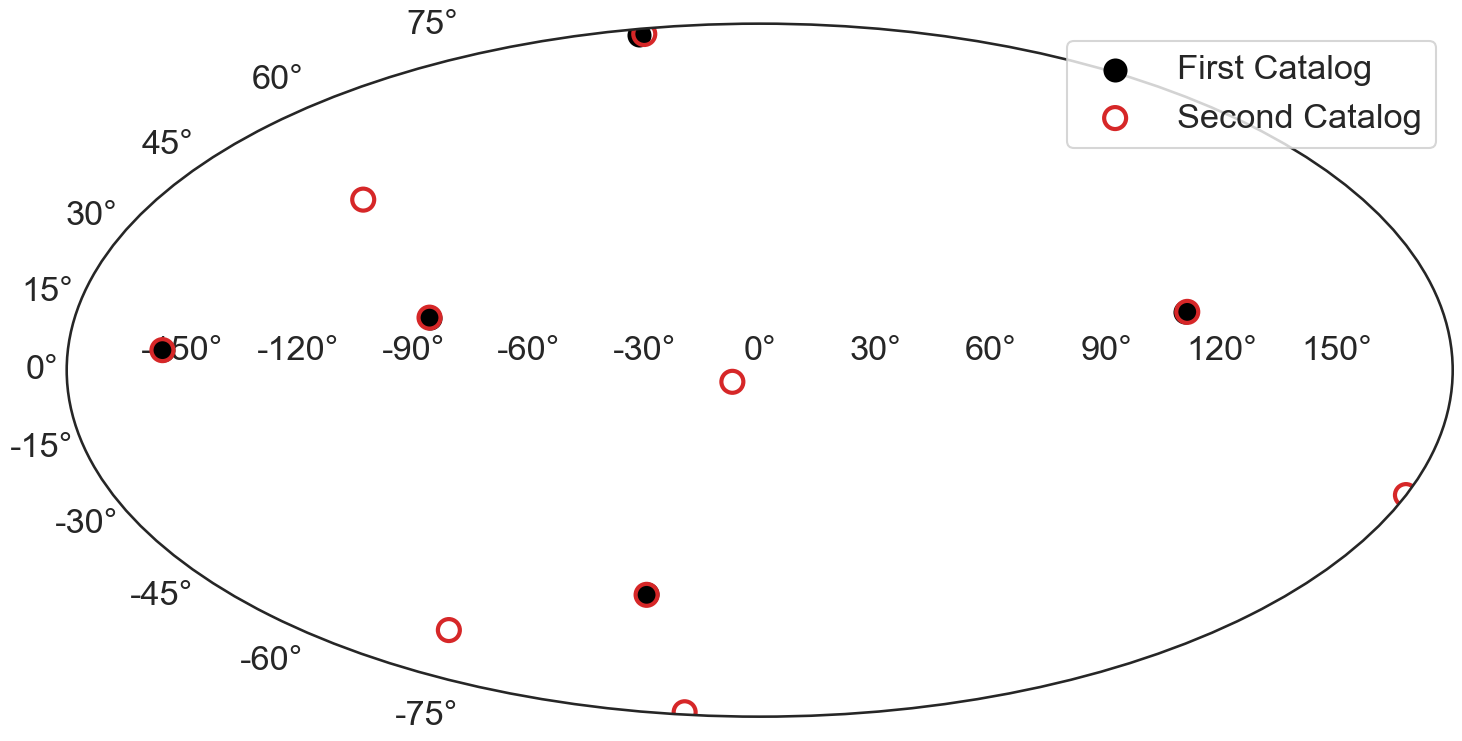

In [88]:
f, ax = plt.subplots(subplot_kw={'projection': 'mollweide'}, figsize=(18, 9))

ax.scatter(first_cat['sc'].ra.wrap_at(180*u.degree).radian, first_cat['sc'].dec.radian, color='k', s=250, label="First Catalog")
ax.scatter(second_cat['sc'].ra.wrap_at(180*u.degree).radian, second_cat['sc'].dec.radian, color='none', linewidth=3, edgecolor='C3', s=250, label="Second Catalog")

ax.legend(loc="upper right")

This use case is often seen when you have separate catalogs that don't share particular ID's (looking at you, SDSS). The most obvious way to merge these catalogs is do a join on their sky positions. Luckily, Astropy provides some great functions using `SkyCoords`.

Let's join our catalogs based on the on-the-sky separate of the targets.

In [75]:
from astropy.table import join_skycoord

full_cat = join(first_cat, second_cat, keys='sc', join_funcs={'sc': join_skycoord(0.5 * u.deg)})

full_cat

sc_id,ra_1,dec_1,mag_1,sc_1,ra_2,dec_2,mag_2,sc_2
,deg,deg,mag(AB),"deg,deg",deg,deg,mag(AB),"deg,deg"
int64,float64,float64,float64,SkyCoord,float64,float64,float64,SkyCoord
1,-86.5692868716939,11.002346883686343,19.432510239217585,"273.4307131283061,11.002346883686343",-86.76016500127909,11.104382292811213,19.432510239217585,"273.2398349987209,11.104382292811213"
2,-38.39189919092951,-49.66226088696262,21.844292316874487,"321.6081008090705,-49.66226088696262",-38.589398612035694,-49.76341712318852,21.844292316874487,"321.41060138796433,-49.76341712318852"
3,-155.16566437199404,4.202747750836096,20.173498296775925,"204.83433562800596,4.202747750836096",-155.3900954802705,4.217956931669496,20.173498296775925,"204.6099045197295,4.217956931669496"


If our data had distance information, we could match on 3D separation by specifying a `distance_func` in the `join_skycoord` function.

<h1 style='text-align: center'>Now we publish and get rich 🤑</h1>

# Example: creating a Gaia color-magnitude diagram

Let's use what we learned to generate a $M_G$ vs. $G_{BP} - G_{RP}$ diagram of the Gaia objects!

## Getting some Gaia data

We'll use `astroquery` (future ACE tutorial, perhaps?) to get us some juicy Gaia data.

In [76]:
from astroquery.gaia import Gaia
from pathlib import Path

query_text = '''SELECT TOP 4096 ra, dec, parallax, pmra, pmdec, radial_velocity,
phot_g_mean_mag, phot_bp_mean_mag, phot_rp_mean_mag
FROM gaiadr2.gaia_source
WHERE parallax_over_error > 10 AND
    parallax > 10 AND
    radial_velocity IS NOT null
ORDER BY random_index
'''

if not Path("gaia_data.fits").exists():
    job = Gaia.launch_job(query_text)
    gaia_data = job.get_results()
    gaia_data.write('gaia_data.fits')

In [77]:
from astropy.table import QTable  # QTables are like Tables, just with more intrinsic Quantity support

gaia_data = QTable.read('gaia_data.fits')

gaia_data[:5]

ra,dec,parallax,pmra,pmdec,radial_velocity,phot_g_mean_mag,phot_bp_mean_mag,phot_rp_mean_mag
deg,deg,mas,mas / yr,mas / yr,km / s,mag,mag,mag
float64,float64,float64,float64,float64,float64,float32,float32,float32
256.8370985186671,46.5081010273448,10.770964834345387,-19.76657104695835,55.92605676622464,-17.673072044811907,12.956912994384766,14.192928314208984,11.859498023986816
129.45826809010867,-6.806694022293258,41.081670013380716,-297.34595349374183,43.83424795415093,35.53814452290586,6.576352119445801,6.931065082550049,6.111272811889648
2.317856723637118,9.00699655780345,17.824765284426462,-171.8278607514459,-1083.8740928197751,-148.91780163518774,13.119074821472168,13.968703269958496,12.223302841186523
330.41287472805976,51.88897801553169,13.0756133009657,-85.30745872006916,-34.23366534215265,-28.726469345049587,12.101919174194336,13.05264949798584,11.149785995483398
147.19500733390703,64.89446697480156,16.93304725892566,2.382528916102615,35.3422776993022,-19.67434662793379,7.0012898445129395,7.242986679077148,6.664536952972412


Let's verify our parallax selection, since a parallax > 10 should mean that we only get objects within ~100 pc. We'll use the Astropy coordinate `Distance` class, which is great for converting things (e.g. redshift, etc) to physical distances (and back).

In [78]:
from astropy.coordinates import Distance

dist = Distance(parallax=gaia_data['parallax'])

dist.min(), dist.max()

(<Distance 8.79909291 pc>, <Distance 99.99985292 pc>)

Nice.

Gaia positions and velocities are given in heliocentric, spherical coordinates, but they're more useful to us in Galactocentric, Catesian coordinates if we want to see the movement of the stars in relation to the center of the galaxy, so let's change that. Luckily, the frame is ICRS already, so we don't need to change that.

In [79]:
from astropy.coordinates import Galactocentric

coords = SkyCoord(
    # Position data
    ra=gaia_data['ra'],
    dec=gaia_data['dec'],
    distance=dist,
    # Velocity Data
    pm_ra_cosdec=gaia_data['pmra'],
    pm_dec=gaia_data['pmdec'],
    radial_velocity=gaia_data['radial_velocity']
)

gal_coords = coords.transform_to(
    Galactocentric(
        z_sun=0 * u.pc,              # Height of the Sun over the Galactic midplane
        galcen_distance=8.1 * u.kpc  # Distance from the Sun to the Galactic center
    )
)

gal_coords

<SkyCoord (Galactocentric: galcen_coord=<ICRS Coordinate: (ra, dec) in deg
    (266.4051, -28.936175)>, galcen_distance=8.1 kpc, galcen_v_sun=(12.9, 245.6, 7.78) km / s, z_sun=0.0 pc, roll=0.0 deg): (x, y, z) in pc
    [(-8077.44468803,  70.79989896,  55.66242071),
     (-8114.06090109, -18.04601124,   8.31586669),
     (-8109.24493623,  32.92015736, -44.47693151), ...,
     (-8114.90897055, -55.25195926, -25.51786784),
     (-8107.06629425, -62.30115086, -33.84123319),
     (-8172.40647266, -20.7968946 ,  65.65737298)]
 (v_x, v_y, v_z) in km / s
    [(-16.26556759, 233.98501167,   4.89424163),
     (-30.94107553, 226.00094753,  -4.85474972),
     (210.89926667, -11.75804787, -36.02277769), ...,
     ( 23.49527642, 207.82648072,  24.21026713),
     (  1.36683177, 201.35536461,  66.24114048),
     (-16.16873283, 194.17237779, -20.23784573)]>

## Let's take a look at the distribution of position and velocity data for Gaia objects in relation to the center of the galaxy

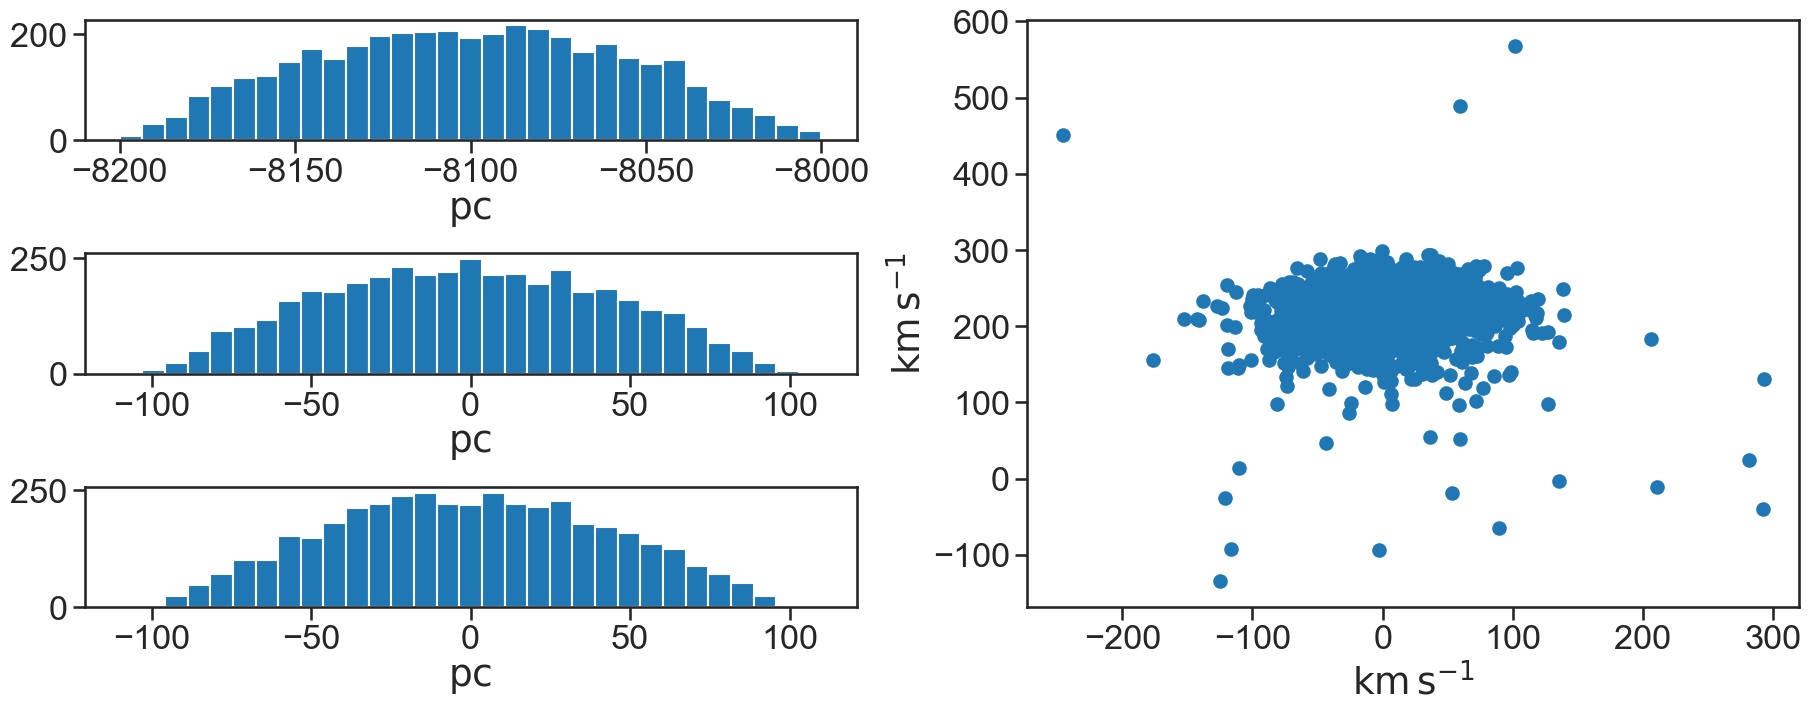

In [80]:
f, axd = plt.subplot_mosaic([['posx', 'vel'], ['posy', 'vel'], ['posz', 'vel']], figsize=(18, 7), layout="constrained")

with quantity_support():
    axd['posx'].hist(gal_coords.x, bins=np.linspace(-8200, -8000, 32))
    axd['posy'].hist(gal_coords.y, bins=np.linspace(-110, 110, 32))
    axd['posz'].hist(gal_coords.z, bins=np.linspace(-110, 110, 32))
    axd['vel'].scatter(gal_coords.v_x, gal_coords.v_y)

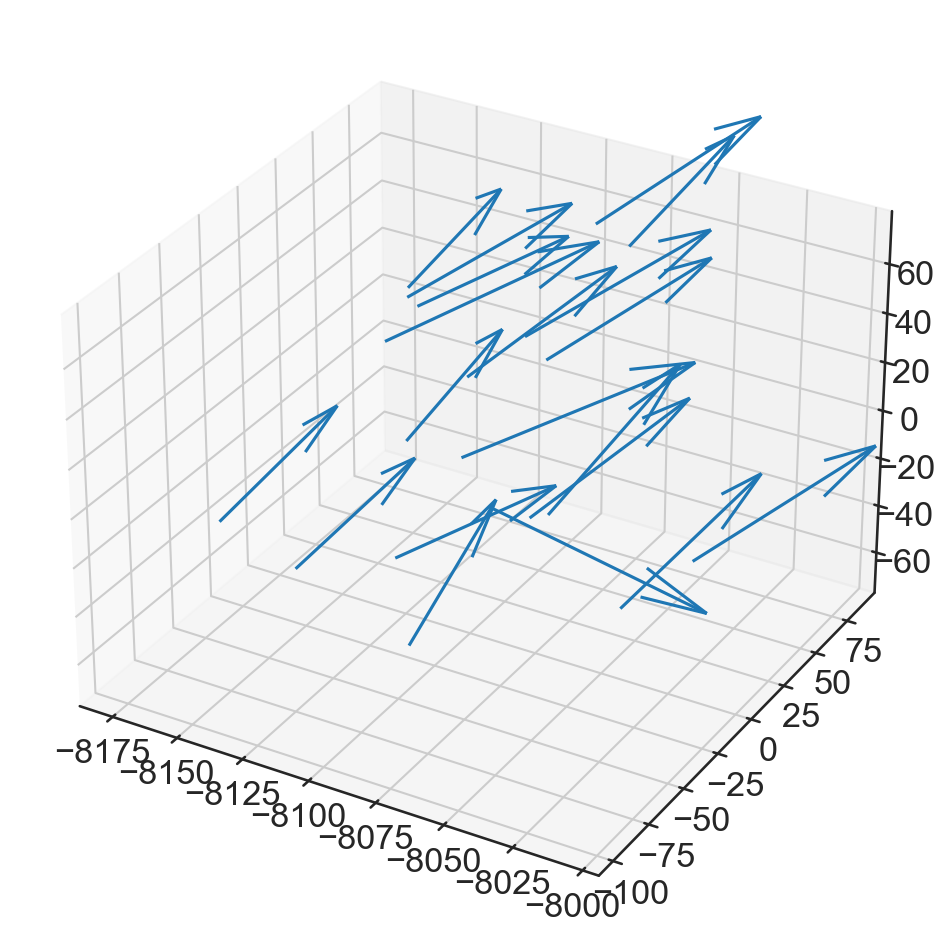

In [81]:
f, ax = plt.subplots(subplot_kw={'projection': '3d'}, figsize=(12, 12))

ax.quiver(gal_coords[:20].x, gal_coords[:20].y, gal_coords[:20].z, gal_coords[:20].v_x, gal_coords[:20].v_y, gal_coords[:20].v_z, length=0.4, normalize=False)

Now let's get the photometric data we need to calculate the color-magnitude diagram. To convert to absolute magnitudes, we'll use the `Distance` object we created earlier.

In [82]:
M_G = gaia_data['phot_g_mean_mag'] - dist.distmod  # Easy access to the distance modulus
BP_RP = gaia_data['phot_bp_mean_mag'] - gaia_data['phot_rp_mean_mag']

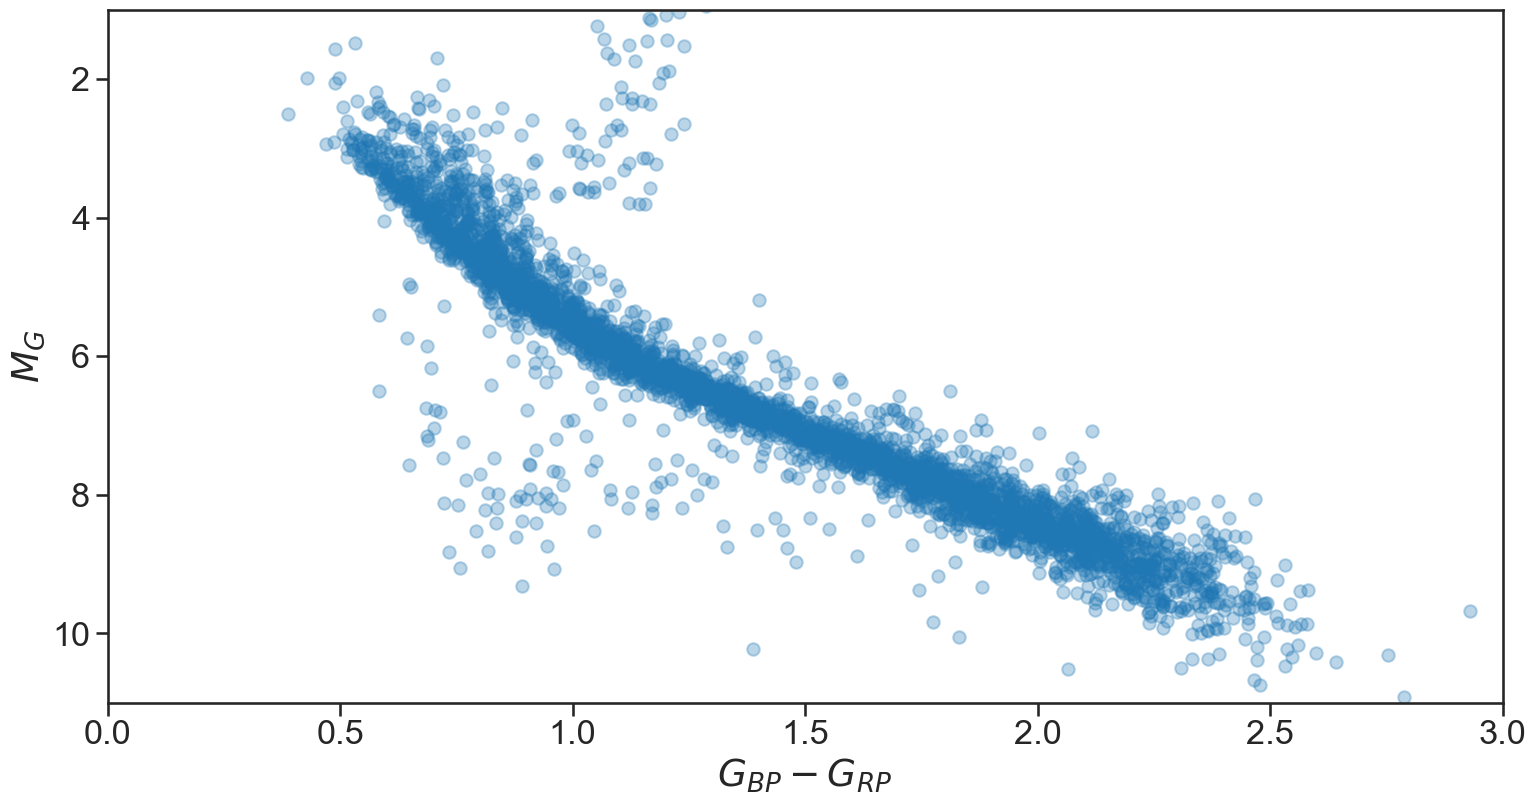

In [83]:
f, ax = plt.subplots(figsize=(18, 9))

ax.scatter(BP_RP.value, M_G.value, alpha=0.3)

ax.set(xlim=(0, 3), ylim=(11, 1), xlabel='$G_{BP}-G_{RP}$', ylabel='$M_G$');

Nice range of star lifetimes contained in this diagram! We can take the general assumption that massive stars were born in the thin disk and therefore have lower vertical amplitudes than the longer-lived main sequence stars. Let's compare.

In [84]:
np.seterr(invalid="ignore")

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [85]:
# Table masking using numpy masks

hi_mass_mask = ((BP_RP > 0.5 * u.mag) & (BP_RP < 0.7 * u.mag) & 
                (M_G > 2 * u.mag) & (M_G < 3.75 * u.mag) & 
                (np.abs(gal_coords.v_y - 220 * u.km/u.s) < 50 * u.km/u.s))

lo_mass_mask = ((BP_RP > 2 * u.mag) & (BP_RP < 2.4 * u.mag) & 
                (M_G > 8.2 * u.mag) & (M_G < 9.7 * u.mag) &
                (np.abs(gal_coords.v_y - 220 * u.km/u.s) < 50 * u.km/u.s))

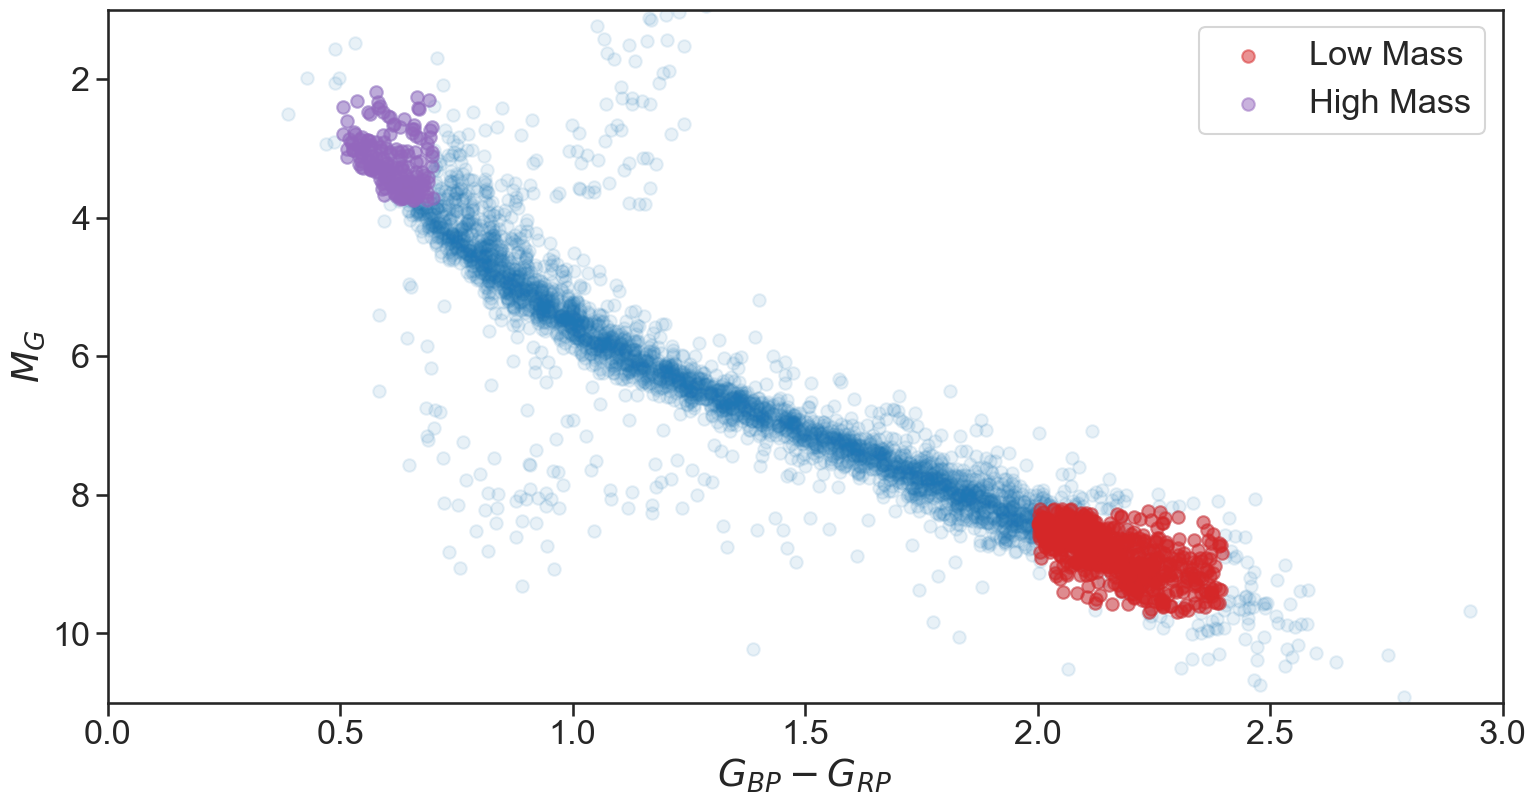

In [86]:
f, ax = plt.subplots(1, 1, figsize=(18, 9))

ax.scatter(BP_RP.value, M_G.value, alpha=0.1)

ax.scatter(BP_RP[lo_mass_mask].value, 
           M_G[lo_mass_mask].value,
           alpha=0.5, color='C3', label="Low Mass")

ax.scatter(BP_RP[hi_mass_mask].value, 
           M_G[hi_mass_mask].value,
           alpha=0.5, color='C4', label="High Mass")

ax.set(xlim=(0, 3), ylim=(11, 1), xlabel='$G_{BP}-G_{RP}$', ylabel='$M_G$')
ax.legend()

<h1 style="text-align:center">Thanks for joining!</h1>